# Import dependencies

In [1]:
%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Connect to database

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [3]:
# Connect to sqlite database using SQLAlchemy ORM
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# View all of the classes that automap found
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Temperature Analysis II

In [7]:
    """Calculate minimum (TMIN), average (TAVE), and maximum (TMAX) 
        temperatures for a list of dates."""

    """Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    
    
    # TODO: write a function that meets the requirements specified above"""

'Args:\n    start_date (string): A date string in the format %Y-%m-%d\n    end_date (string): A date string in the format %Y-%m-%d\n    \nReturns:\n    TMIN, TAVE, and TMAX\n\n\n# TODO: write a function that meets the requirements specified above'

In [39]:
def calc_temps(start_date,end_date):

    sel = func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)
    results = session.query(*sel).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

    for row in results:
        temp_dict = {}
        temp_dict['Max'] = row[0]
        temp_dict['Min'] = row[1]
        temp_dict['Avg'] = row[2]
    
    return temp_dict

In [40]:
# Using your function, calculate the min, avg, and max for the matching dates
# from the previous year
calc_temps('2017-08-01','2017-08-07')


{'Max': 83.0, 'Min': 72.0, 'Avg': 79.25}

In [41]:
# Plot results as a bar chart per instructions in README
tmax = temp_dict['Max']
tmin = temp_dict['Min']
tave = temp_dict['Avg']

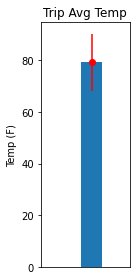

In [13]:
x = [1]
y = [tave]
yerr = [tmax-tmin]
plt.figure(figsize=(2,4))
plt.bar(x,y, align='center')
plt.errorbar(x,y,yerr=yerr, fmt="o", color="r")
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.yticks(np.arange(0, max(y)+10, 20))
plt.xlim(-1,2.5)
plt.xticks([]) 
plt.tight_layout()
plt.show()

## Daily Rainfall Average

In [14]:
# Query rainfall per weather station for previous year, sorted by precipitation
# Include station, name, latitude, longitude, and elevation
start_date ='2017-08-01'
end_date = '2017-08-07'

sel = [Station.station, Station.name, Station.latitude, Station.longitude,\
       Station.elevation, func.avg(Measurement.prcp)]

result = session.query(*sel).group_by(Measurement.station).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
filter(Measurement.station == Station.station).\
order_by(func.avg(Measurement.prcp).desc()).all()

result

result_df = pd.DataFrame(result, columns=["Station ID", "Station Name", "Latitude", "Longitude", "Elevation","Precipitation"])
result_df

,Station ID,Station Name,Latitude,Longitude,Elevation,Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.120000
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.036667
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.020000
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.005714
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.000000


## Daily Temperature Normals

In [15]:
   """Calculate Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals: tmin, tavg, and tmax
    
    """
    
    # TODO: write a function that meets the requirements specified above
def daily_normals(start_date,end_date):
   
    
    sel = [func.strftime("%m-%d", Measurement.date),\
       func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)]
    
    results = session.query(*sel).group_by(func.strftime("%m-%d", Measurement.date)).\
        filter(func.strftime("%m-%d", Measurement.date) >= start_date).\
        filter(func.strftime("%m-%d", Measurement.date) <= end_date).all()


    return(results)
 

    

In [16]:
# Calculate the daily normals for each day of your trip (inclusive)
daily = daily_normals('08-01','08-07')
daily


[('08-01', 83.0, 67.0, 75.54),
 ('08-02', 84.0, 68.0, 75.60377358490567),
 ('08-03', 85.0, 70.0, 76.61111111111111),
 ('08-04', 84.0, 69.0, 76.71153846153847),
 ('08-05', 82.0, 69.0, 76.14814814814815),
 ('08-06', 83.0, 67.0, 76.25),
 ('08-07', 83.0, 71.0, 77.15686274509804)]

In [17]:
# Load results into a dataframe per README instructions
daily_normal_df = pd.DataFrame(daily, columns=["Date","Max","Min","Avg"])
daily_normal_df= daily_normal_df.set_index("Date")

In [18]:
list(daily_normal_df.index.values)

['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']

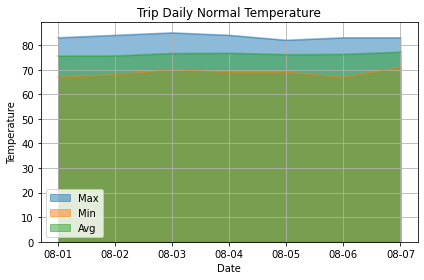

In [19]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normal_df.plot.area(stacked=False)
# x = daily_normal_df["Date"]
plt.title("Trip Daily Normal Temperature")
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.grid()
# # plt.axes.set_xticklabels(['08-01','08-02','08-03','08-04','08-05','08-06','08-07'])
# plt.xticks(list(daily_normal_df.index),)
plt.tight_layout()
plt.show()

## Close Session

In [20]:
# # Close the session
session.close()